In [1]:
pip install requests matplotlib seaborn pandas


In [2]:
import requests


In [3]:
API_KEY = 'your_api_key_here'  # Replace this with your actual API key
CITY = 'Mumbai'


In [4]:
URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"


In [5]:
response = requests.get(URL)


In [6]:
data = response.json()


In [7]:
print(data)


{'cod': 401, 'message': 'Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.'}


In [8]:
import requests

API_KEY = 'your_api_key_here'  # <- Put your actual API key here
CITY = 'Mumbai'

URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

response = requests.get(URL)
data = response.json()

print(data)


{'cod': 401, 'message': 'Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.'}


In [9]:
import requests

API_KEY = 'ee994358dcd11d424779875065e53c67'  # <- Put your actual API key here
CITY = 'Mumbai'

URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

response = requests.get(URL)
data = response.json()

print(data)


{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1754222400, 'main': {'temp': 29.99, 'feels_like': 36.01, 'temp_min': 27.82, 'temp_max': 29.99, 'pressure': 1007, 'sea_level': 1007, 'grnd_level': 1006, 'humidity': 74, 'temp_kf': 2.17}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 75}, 'wind': {'speed': 6.09, 'deg': 204, 'gust': 6.41}, 'visibility': 10000, 'pop': 0.34, 'rain': {'3h': 0.18}, 'sys': {'pod': 'd'}, 'dt_txt': '2025-08-03 12:00:00'}, {'dt': 1754233200, 'main': {'temp': 29.24, 'feels_like': 34.73, 'temp_min': 27.74, 'temp_max': 29.24, 'pressure': 1007, 'sea_level': 1007, 'grnd_level': 1007, 'humidity': 77, 'temp_kf': 1.5}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'clouds': {'all': 83}, 'wind': {'speed': 4.73, 'deg': 197, 'gust': 5.6}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2025-08-03 15:00:00'}, {'dt': 1754244000, 'main': {'temp': 28.5, 'fe

In [10]:
import pandas as pd
from datetime import datetime

# Extract and prepare weather data
weather_data = {
    "datetime": [],
    "temperature": [],
    "humidity": [],
    "weather": []
}

for entry in data['list']:
    weather_data['datetime'].append(entry['dt_txt'])  # or use datetime.fromtimestamp(entry['dt'])
    weather_data['temperature'].append(entry['main']['temp'])
    weather_data['humidity'].append(entry['main']['humidity'])
    weather_data['weather'].append(entry['weather'][0]['main'])

# Create DataFrame
df = pd.DataFrame(weather_data)

# Display the first few rows
print(df.head())


              datetime  temperature  humidity weather
0  2025-08-03 12:00:00        29.99        74    Rain
1  2025-08-03 15:00:00        29.24        77  Clouds
2  2025-08-03 18:00:00        28.50        78    Rain
3  2025-08-03 21:00:00        27.22        80    Rain
4  2025-08-04 00:00:00        27.15        80    Rain


In [11]:
!pip install matplotlib seaborn


/tmp/ipython-input-386377169.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=df, palette='Set2')
/tmp/ipython-input-386377169.py:33: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-386377169.py:33: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-386377169.py:33: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) m

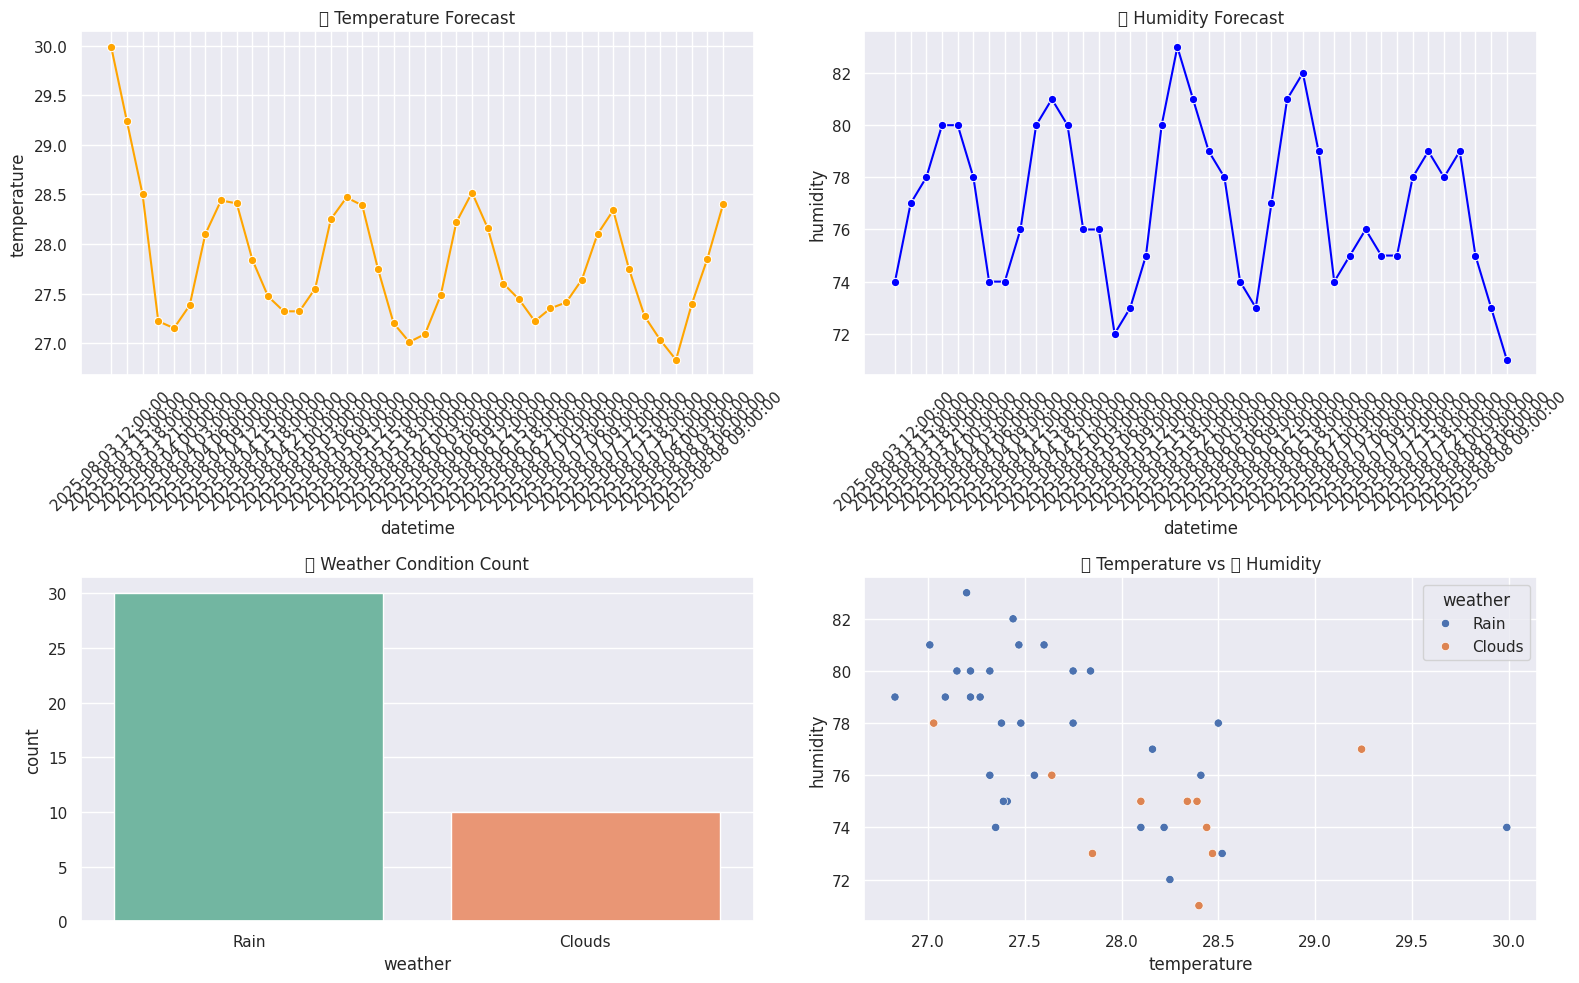

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set(style="darkgrid")

# Make the figure larger
plt.figure(figsize=(16, 10))

# Plot 1: Temperature over time
plt.subplot(2, 2, 1)
sns.lineplot(x='datetime', y='temperature', data=df, marker='o', color='orange')
plt.title("🌡️ Temperature Forecast")
plt.xticks(rotation=45)

# Plot 2: Humidity over time
plt.subplot(2, 2, 2)
sns.lineplot(x='datetime', y='humidity', data=df, marker='o', color='blue')
plt.title("💧 Humidity Forecast")
plt.xticks(rotation=45)

# Plot 3: Count of weather types
plt.subplot(2, 2, 3)
sns.countplot(x='weather', data=df, palette='Set2')
plt.title("🌦️ Weather Condition Count")

# Plot 4: Scatter plot - Temperature vs Humidity
plt.subplot(2, 2, 4)
sns.scatterplot(x='temperature', y='humidity', hue='weather', data=df)
plt.title("🌡️ Temperature vs 💧 Humidity")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the dashboard
plt.show()


In [13]:
plt.savefig("weather_dashboard.png")


<Figure size 640x480 with 0 Axes>